# La Neurona Artificial (y la Regresión Logística) en Keras

## 1. Configuración

In [1]:
ruta = r'C:\Users\yordy\OneDrive\Escritorio\Internet Explorer\deep\learn\assets\datasets\binary.csv'

## 2. Lectura y visualización del set de datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
np.random.seed(110)
tf.random.set_seed(55)

C:\Users\yordy\AppData\Local\Temp\ipykernel_6440\555018113.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = pd.read_csv(ruta)

In [4]:
data.head()

,x1,x2,y
0,1.0,7.0,1
1,4.0,0.5,0
2,6.0,3.0,1
3,1.0,4.0,0
4,3.0,4.5,1


In [5]:
data.shape

(14, 3)

In [6]:
X = data[['x1','x2']].to_numpy()
X.shape

(14, 2)

In [7]:
y = data[['y']].to_numpy()
y.shape
print(y)

[[1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]]


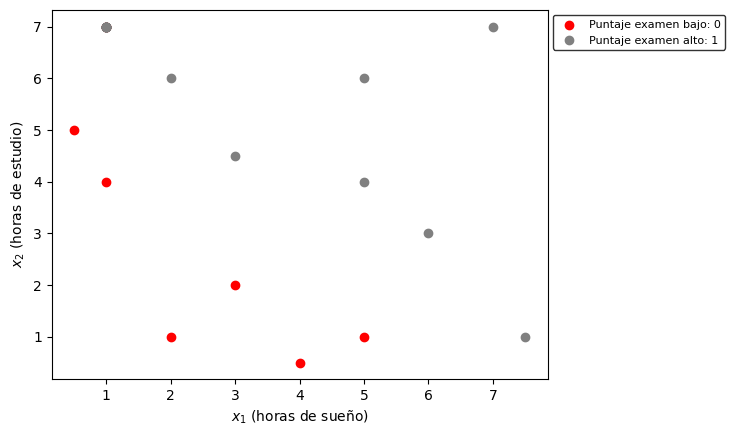

In [8]:
idx0 = np.where(y==0) # Puntaje examen bajo
idx1 = np.where(y==1) # Puntaje examen alto

plt.scatter(X[idx0,0],X[idx0,1],color='red',label='Puntaje examen bajo: 0')
plt.scatter(X[idx1,0],X[idx1,1],color='gray',label='Puntaje examen alto: 1')
plt.xlabel('$x_1$ (horas de sueño)')
plt.ylabel('$x_2$ (horas de estudio)')
plt.legend(bbox_to_anchor=(1.0,1.0),fontsize=8,edgecolor='black')

## 3. Crear la Neurona Artificial (modelo de Regresión Logística/Clasificación binaria) en Keras

In [9]:
# Contenedor vacío
modelo = Sequential()

In [10]:
# Parámetros de entrada del modelo
dim_entrada = X.shape[1]    # Cada ejemplo de entrenamiento tendrá 2 características (x1,x2)
dim_salida = 1              # El dato de salida será un escalar (probabilidad)

# Comenzar a llenar el modelo ('add')
modelo.add(Dense(dim_salida, input_dim = dim_entrada, activation='sigmoid'))
# ¡Y listo, ya tenemos la neurona!

In [11]:
# Información del modelo: w1x1 + w2x2 + b
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


## 4. Optimizador (Gradiente Descendente Estocástico) y pérdida

In [12]:
# Optimización: se usará gradiente descendente (SGD) con lr=0.2, función de error entropía
# cruzada (binary_crossentropy), métrica para el desempeño: accuracy (precisión)

optimizador = SGD(learning_rate=0.4)
modelo.compile(loss='binary_crossentropy', optimizer=optimizador, metrics=['accuracy'])

## 5. Entrenamiento y predicción

In [19]:
n_epochs = 100
s_minibatches = X.shape[0]  # Cada batch será del mismo tamaño del set de entrenamiento
historia = modelo.fit(X,y,epochs=n_epochs,batch_size=s_minibatches,verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2973 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2959 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2946 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2933 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2920 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2907 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.2894 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 0.2882 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 0.2869 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2857 - accuracy: 1.0000
Epoch 11/100
1/1 [=======

### 5.1 Comportamiento del error

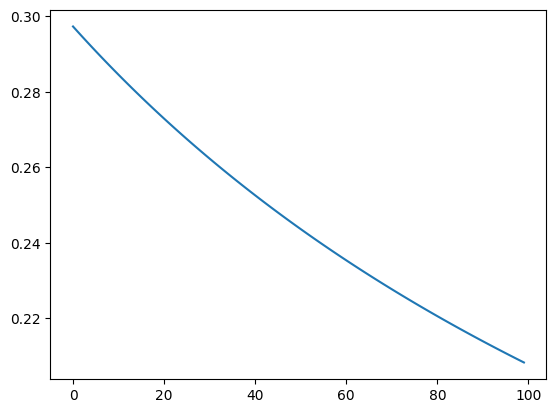

In [20]:
plt.plot(historia.history['loss']);

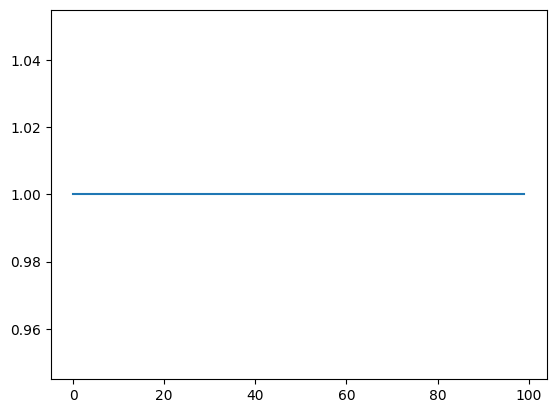

In [21]:
plt.plot(historia.history['accuracy']);

### 5.2 Predicción

18750/18750 [==============================] - 24s 1ms/step


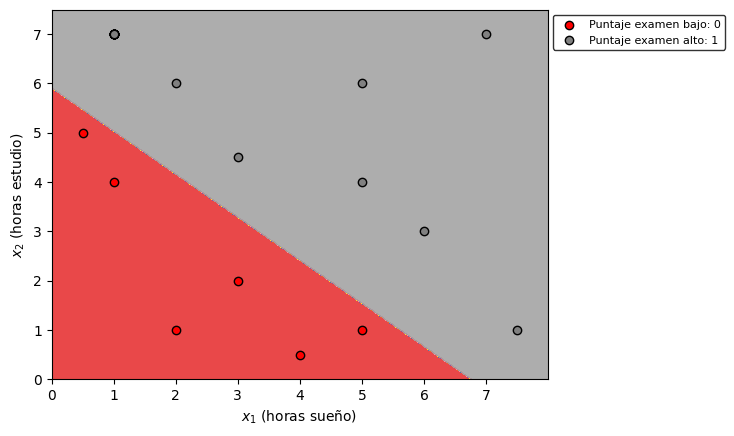

In [22]:
def dibujar_frontera(X,Y,modelo):
    # Valor mínimo y máximo y rellenado con ceros
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    # Grilla de puntos
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predecir categorías para cada punto en la grilla
    probabilidades = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

    umbral = 0.5
    Z = np.where(probabilidades > umbral, 1, 0)
    #Z = modelo.predict_classes(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.8)

    idx0 = np.where(Y==0)
    idx1 = np.where(Y==1)
    plt.scatter(X[idx0,0],X[idx0,1],color='red', edgecolor='k', label='Puntaje examen bajo: 0')
    plt.scatter(X[idx1,0],X[idx1,1],color='gray',edgecolor='k', label='Puntaje examen alto: 1')
    plt.legend(bbox_to_anchor=(1.0,1.0),fontsize=8,edgecolor='black')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.xlabel('$x_1$ (horas sueño)')
    plt.ylabel('$x_2$ (horas estudio)')

dibujar_frontera(X,y,modelo)